In [10]:
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [11]:
def load_data():
    wine = load_wine()
    # print(wine.data.shape)
    win_data = pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)
    # print(win_data.head())

    x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)
    return x_train, y_train, x_test, y_test


def build_model():
    clf = tree.DecisionTreeClassifier(criterion="entropy")
    return clf

In [12]:
feature_name = ['酒精', '苹果酸', '灰', '灰的碱性', '镁', '总酚', '类黄酮', '非黄烷类酚类', '花青素', '颜 色强度', '色调', 'od280/od315稀释葡萄酒',
                    '脯氨酸']

In [13]:
def plot_tree(model):
    dot_data = tree.export_graphviz(model,
                                     feature_names=feature_name,
                                     class_names=["琴酒","雪莉","贝尔摩德"],
                                     filled=True,
                                     rounded=True)
    graph = graphviz.Source(dot_data)
    return graph

0.9074074074074074


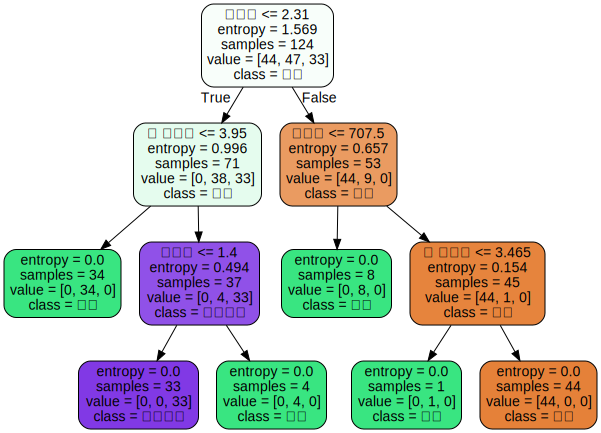

In [14]:
x_train, y_train, x_test, y_test = load_data()
model = build_model()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print(score)

graph = plot_tree(model)
graph

In [15]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.55134708, 0.        , 0.        , 0.30517551,
       0.        , 0.        , 0.14347741])

In [16]:
[*zip(feature_name,model.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.5513470812080731),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜 色强度', 0.30517550806610544),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.1434774107258215)]

In [17]:
model = tree.DecisionTreeClassifier(criterion="entropy", random_state=30)
model = model.fit(x_train, y_train)
score = model.score(x_test, y_test)
score

0.9074074074074074

In [18]:
model = tree.DecisionTreeClassifier(criterion="entropy", 
                                    random_state=30,
                                    splitter="random"
                                   )
model = model.fit(x_train, y_train)
score = model.score(x_test, y_test)
score

0.8703703703703703

# 设置剪枝

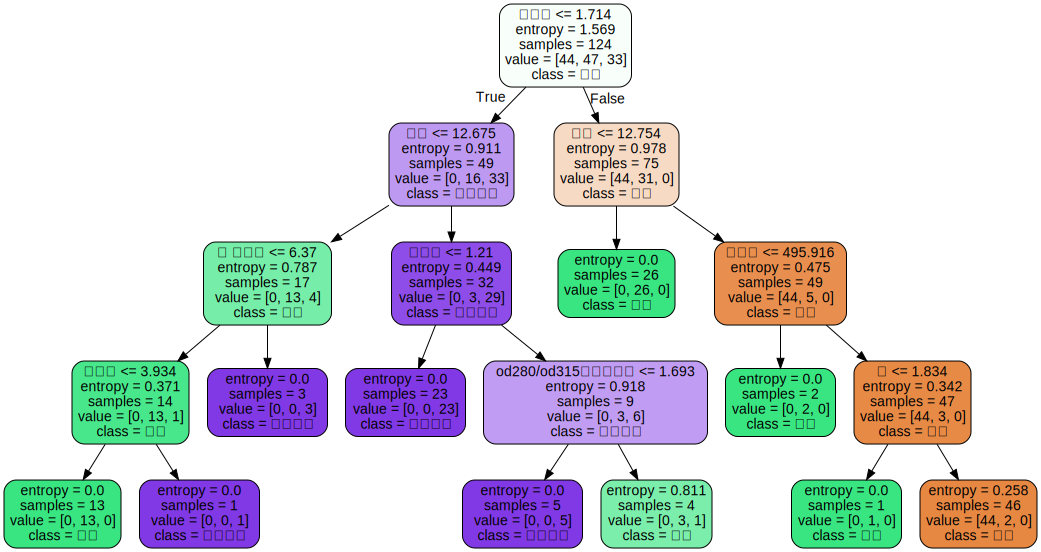

In [36]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=4
#                                   ,min_samples_leaf=10
#                                   ,min_samples_split=10
                                )
clf = clf.fit(x_train, y_train)
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [37]:
score = clf.score(x_test, y_test)

In [38]:
score

0.9629629629629629

# 按照深度绘制准确率曲线

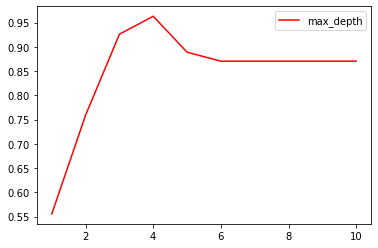

In [35]:
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth = i+1,
                                     criterion='entropy',
                                     random_state=30,
                                     splitter="random")
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    test.append(score)
plt.plot(range(1,11), test, color="red", label="max_depth")
plt.legend()
plt.show()

In [39]:
clf.apply(x_test)

array([ 8, 18,  4, 13,  4, 13, 13, 13, 13, 18, 13, 18,  4,  6, 13, 18, 13,
       18, 15, 13, 13, 18,  4, 13,  8, 18, 11, 15, 13,  4, 18, 18,  8, 18,
        4,  6,  8, 10,  8, 18,  8,  4,  8, 18, 13,  4, 18,  8, 13, 18, 18,
        5,  8, 13])

In [40]:
clf.predict(x_test)

array([2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0,
       1, 1, 0, 2, 1, 0, 0, 2, 2, 1])